In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
%pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\garima shrivastava\appdata\local\programs\python\python312\lib\site-packages (2.2.2)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
start = '2010-01-01'
end = '2023-12-31'

stock = 'MSFT'

data =  yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.592496,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.523831,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.132495,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.780218,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.977255,189680313
...,...,...,...,...,...,...
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700
2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900
2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100


In [7]:
data.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.592496,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.523831,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.132495,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.780218,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.977255,189680313
...,...,...,...,...,...,...,...
3662,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700
3663,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900
3664,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100
3665,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900


In [8]:
ma_100_days = data.Close.rolling(100).mean()

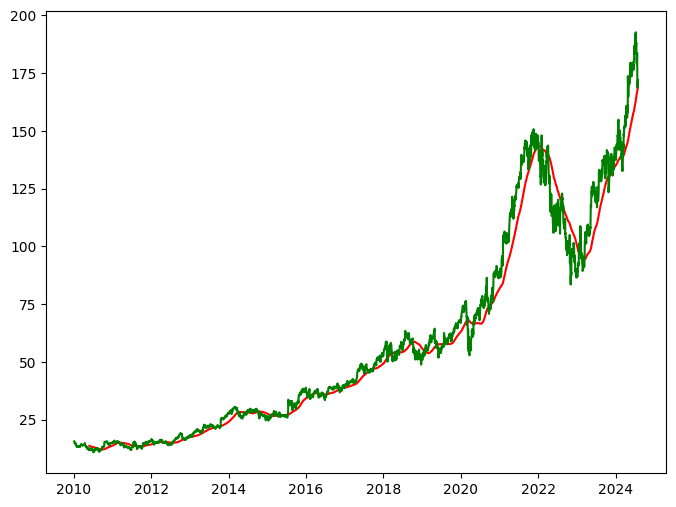

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

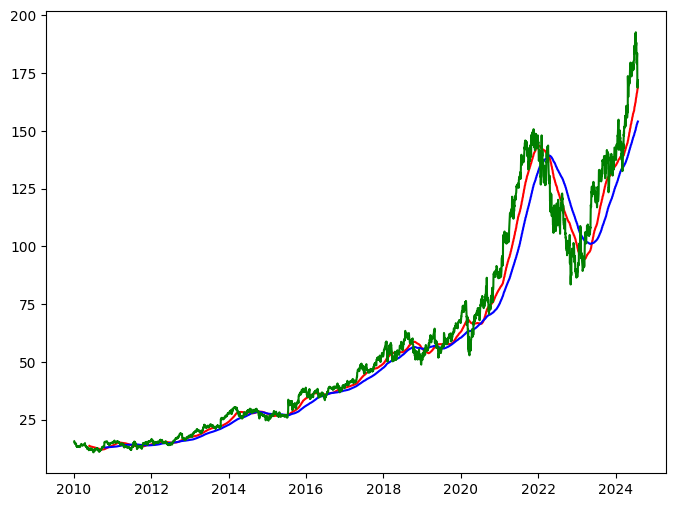

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
#cleaning the data
data.dropna(inplace=True)

In [13]:
#splitting into 80% training data and 20% test data
train_data = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
test_data =pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [14]:
train_data.shape[0]
train_data

,Close
Date,
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037
2010-01-08,14.994298
...,...
2021-08-20,138.436996
2021-08-23,141.099503
2021-08-24,142.398499


In [15]:
test_data.shape[0]

734

In [16]:
#scaling the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [17]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
train_data_scale = scaler.fit_transform(train_data)
train_data_scale

array([[0.03595455],
       [0.03543413],
       [0.03246808],
       ...,
       [0.9958248 ],
       [1.        ],
       [0.9937391 ]])

In [19]:
#using the previous 100 days data to calculate the price for the next day
x = []
y = []

for i in range(100, train_data_scale.shape[0]):
    x.append(train_data_scale[i-100:i])
    y.append(train_data_scale[i, 0])

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
%pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
%pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [24]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\Garima Shrivastava\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 32s 238ms/step - loss: 0.0252
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - loss: 0.0044
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - loss: 0.0030
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - loss: 0.0029
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 247ms/step - loss: 0.0028
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - loss: 0.0026
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - loss: 0.0026
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - loss: 0.0025
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - loss: 0.0020
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - loss: 0.0020
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - loss: 0.0020
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - loss: 0.0019
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - loss: 0.0018
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - loss: 0.0015
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [28]:
past_100_days = train_data.tail(100)

In [29]:
test_data = pd.concat([past_100_days, test_data], ignore_index=True)

In [30]:
test_data

,Close
0,112.484001
1,113.272003
2,114.293999
3,112.739502
4,113.363503
...,...
829,174.369995
830,169.160004
831,168.679993
832,171.130005


In [31]:
test_data_scale = scaler.fit_transform(test_data)

In [32]:
x = []
y = []

for i in range(100, test_data_scale.shape[0]):
    x.append(test_data_scale[i-100:i])
    y.append(test_data_scale[i, 0])

x, y = np.array(x), np.array(y)

In [33]:
y_predict = model.predict(x)

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step


In [34]:
scale = 1/scaler.scale_   #means the original data was divided by this value to get a value between 0 and 1

In [35]:
y_predict = y_predict * scale      #predicted values

In [36]:
y = y * scale                     #actual values

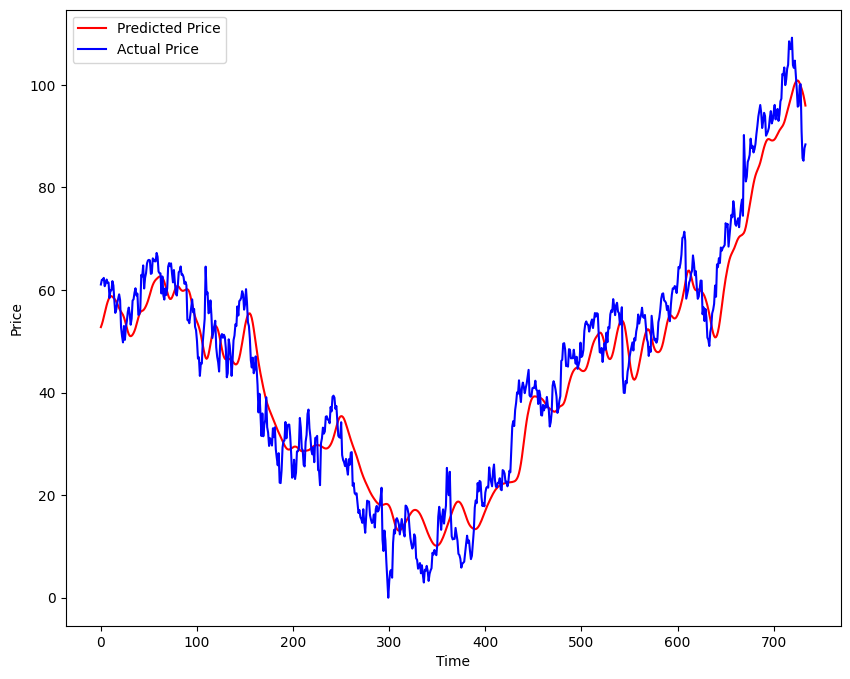

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'b', label = 'Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock Price Prediction Model.keras')